## QUIZ 3

Autor: Danilo Aparecido Namitala - 202011125

fonte: https://github.com/DaniloNamitala/rede_neural

### Bibliiotecas

In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt

### Funções de Ativação

In [2]:
def relu(x):
    return max(0, x)

def relu_derivative(x):
    if x > 0:
        return 1
    return 0

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

### Estrutura de Dados

In [20]:
# Neurons a1 to a5 represented by indexes 0 to 4
v = [0, 0, 0, 0, 0]
e = [0, 0, 0, 0, 0]
w = np.array([
    [0.,  0.,  0.,   0., 0.],
    [3.,  0.,  0.,   0., 0.],
    [-4.,  1.,  0.,   0., 0.],
    [-1., -3.,  0.,   0., 0.], 
    [0.,  0.,  2., -10., 0.], 
])
b = np.array([0., 0., 0., 0., 0.])  # Bias terms
f = [sigmoid, relu, sigmoid, sigmoid, None]
fd = [sigmoid_derivative, relu_derivative, sigmoid_derivative, sigmoid_derivative, None]

### Simular a Rede Neural

In [31]:
def forward(entry):
    v[-1] = entry
    for i in range(len(v) - 2, -1, -1):
        v[i] = 0
        for j in range(len(v)):
            v[i] += v[j] * w[j][i]
        v[i] += b[i]  # Add bias term
        v[i] = f[i](v[i])

def calculate_error(expected):
    global e
    e = [0, 0, 0, 0, 0]
    e[0] = (v[0] - expected) * fd[0](v[0])

    for i in range(1, len(v) - 1):
        for j in range(len(v)):
            e[i] += e[j] * w[j][i]
        e[i] = e[i] * fd[i](v[i])

def update_weights():
    for i in range(len(w)):
        for j in range(len(w[i])):
            w[j][i] = w[j][i] - 0.1 * e[i] * v[j]
        b[i] = b[i] - 0.1 * e[i]  # Update bias term

In [32]:
x = 0.0
y = 0.5
print("Resultados para x = 0.0 y = 0.5")

forward(x)
print("a1\ta2\ta3\ta4\ta5")
print("-"*40)
print("\t".join([f"{v[i]:.3f}" for i in range(len(v))]))
calculate_error(y)
print("-"*40)
print(f"e1\te2\te3\te4\te5")
print("-"*40)
print("\t".join([f"{e[i]:.3f}" for i in range(len(e))]))

print("\n\n\n")

x1 = 1
y1 = 0.1
print("Resultados para x = 1 y = 0.1")

forward(x1)
print("a1\ta2\ta3\ta4\ta5")
print("-"*40)
print("\t".join([f"{v[i]:.3f}" for i in range(len(v))]))
calculate_error(y1)
print("-"*40)
print(f"e1\te2\te3\te4\te5")
print("-"*40)
print("\t".join([f"{e[i]:.3f}" for i in range(len(e))]))

Resultados para x = 0.0 y = 0.5
a1	a2	a3	a4	a5
----------------------------------------
0.076	0.000	0.500	0.500	0.000
----------------------------------------
e1	e2	e3	e4	e5
----------------------------------------
-0.030	0.000	0.000	0.000	0.000




Resultados para x = 1 y = 0.1
a1	a2	a3	a4	a5
----------------------------------------
0.293	0.881	0.881	0.000	1.000
----------------------------------------
e1	e2	e3	e4	e5
----------------------------------------
0.040	0.000	0.000	0.000	0.000


### Treinamento

In [38]:
def train(entries, outs):
    for i in range(2*9999):
        for (en, ex) in zip(entries, outs):
            forward(en)
            calculate_error(ex)
            update_weights()

def predict(entry):
    forward(entry)
    return v[0]

In [35]:
entries = [-3.0, -2.0, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 3.0]
outs = [0.73212, 0.7339, 0.7838, 0.8903, 0.9820, 0.8114, 0.5937, 0.5219, 0.5049, 0.5002]

train(entries, outs)

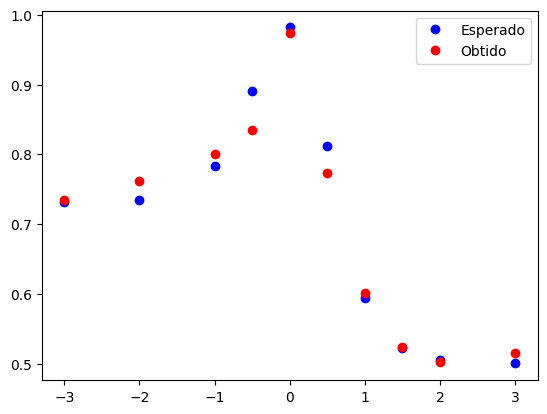

In [70]:
test_result = [predict(x) for x in entries]

plt.plot(entries, outs, 'bo')
plt.plot(entries, test_result, 'ro')
plt.legend(['Esperado', 'Obtido'])